In [2]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
runName = '/global/homes/h/husni/lsstpsf/simruns/minion_1016_sqlite'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric()
sqlconstraint = 'filter = "r" and propID = 54'
stackerList = [stackers.RandomDitherFieldPerVisitStacker(degrees=False)]
slicer = slicers.HealpixSlicer(nside=64, lonCol='randomDitherFieldPerVisitRa', latCol='randomDitherFieldPerVisitDec', latLonDeg=False)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 



Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database Summary with constraint filter = "r" and propID = 54 for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']
Found 456557 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
bundle = myBundles['field dither']

In [6]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>27.1), bundle.metricValues.data<27.4)

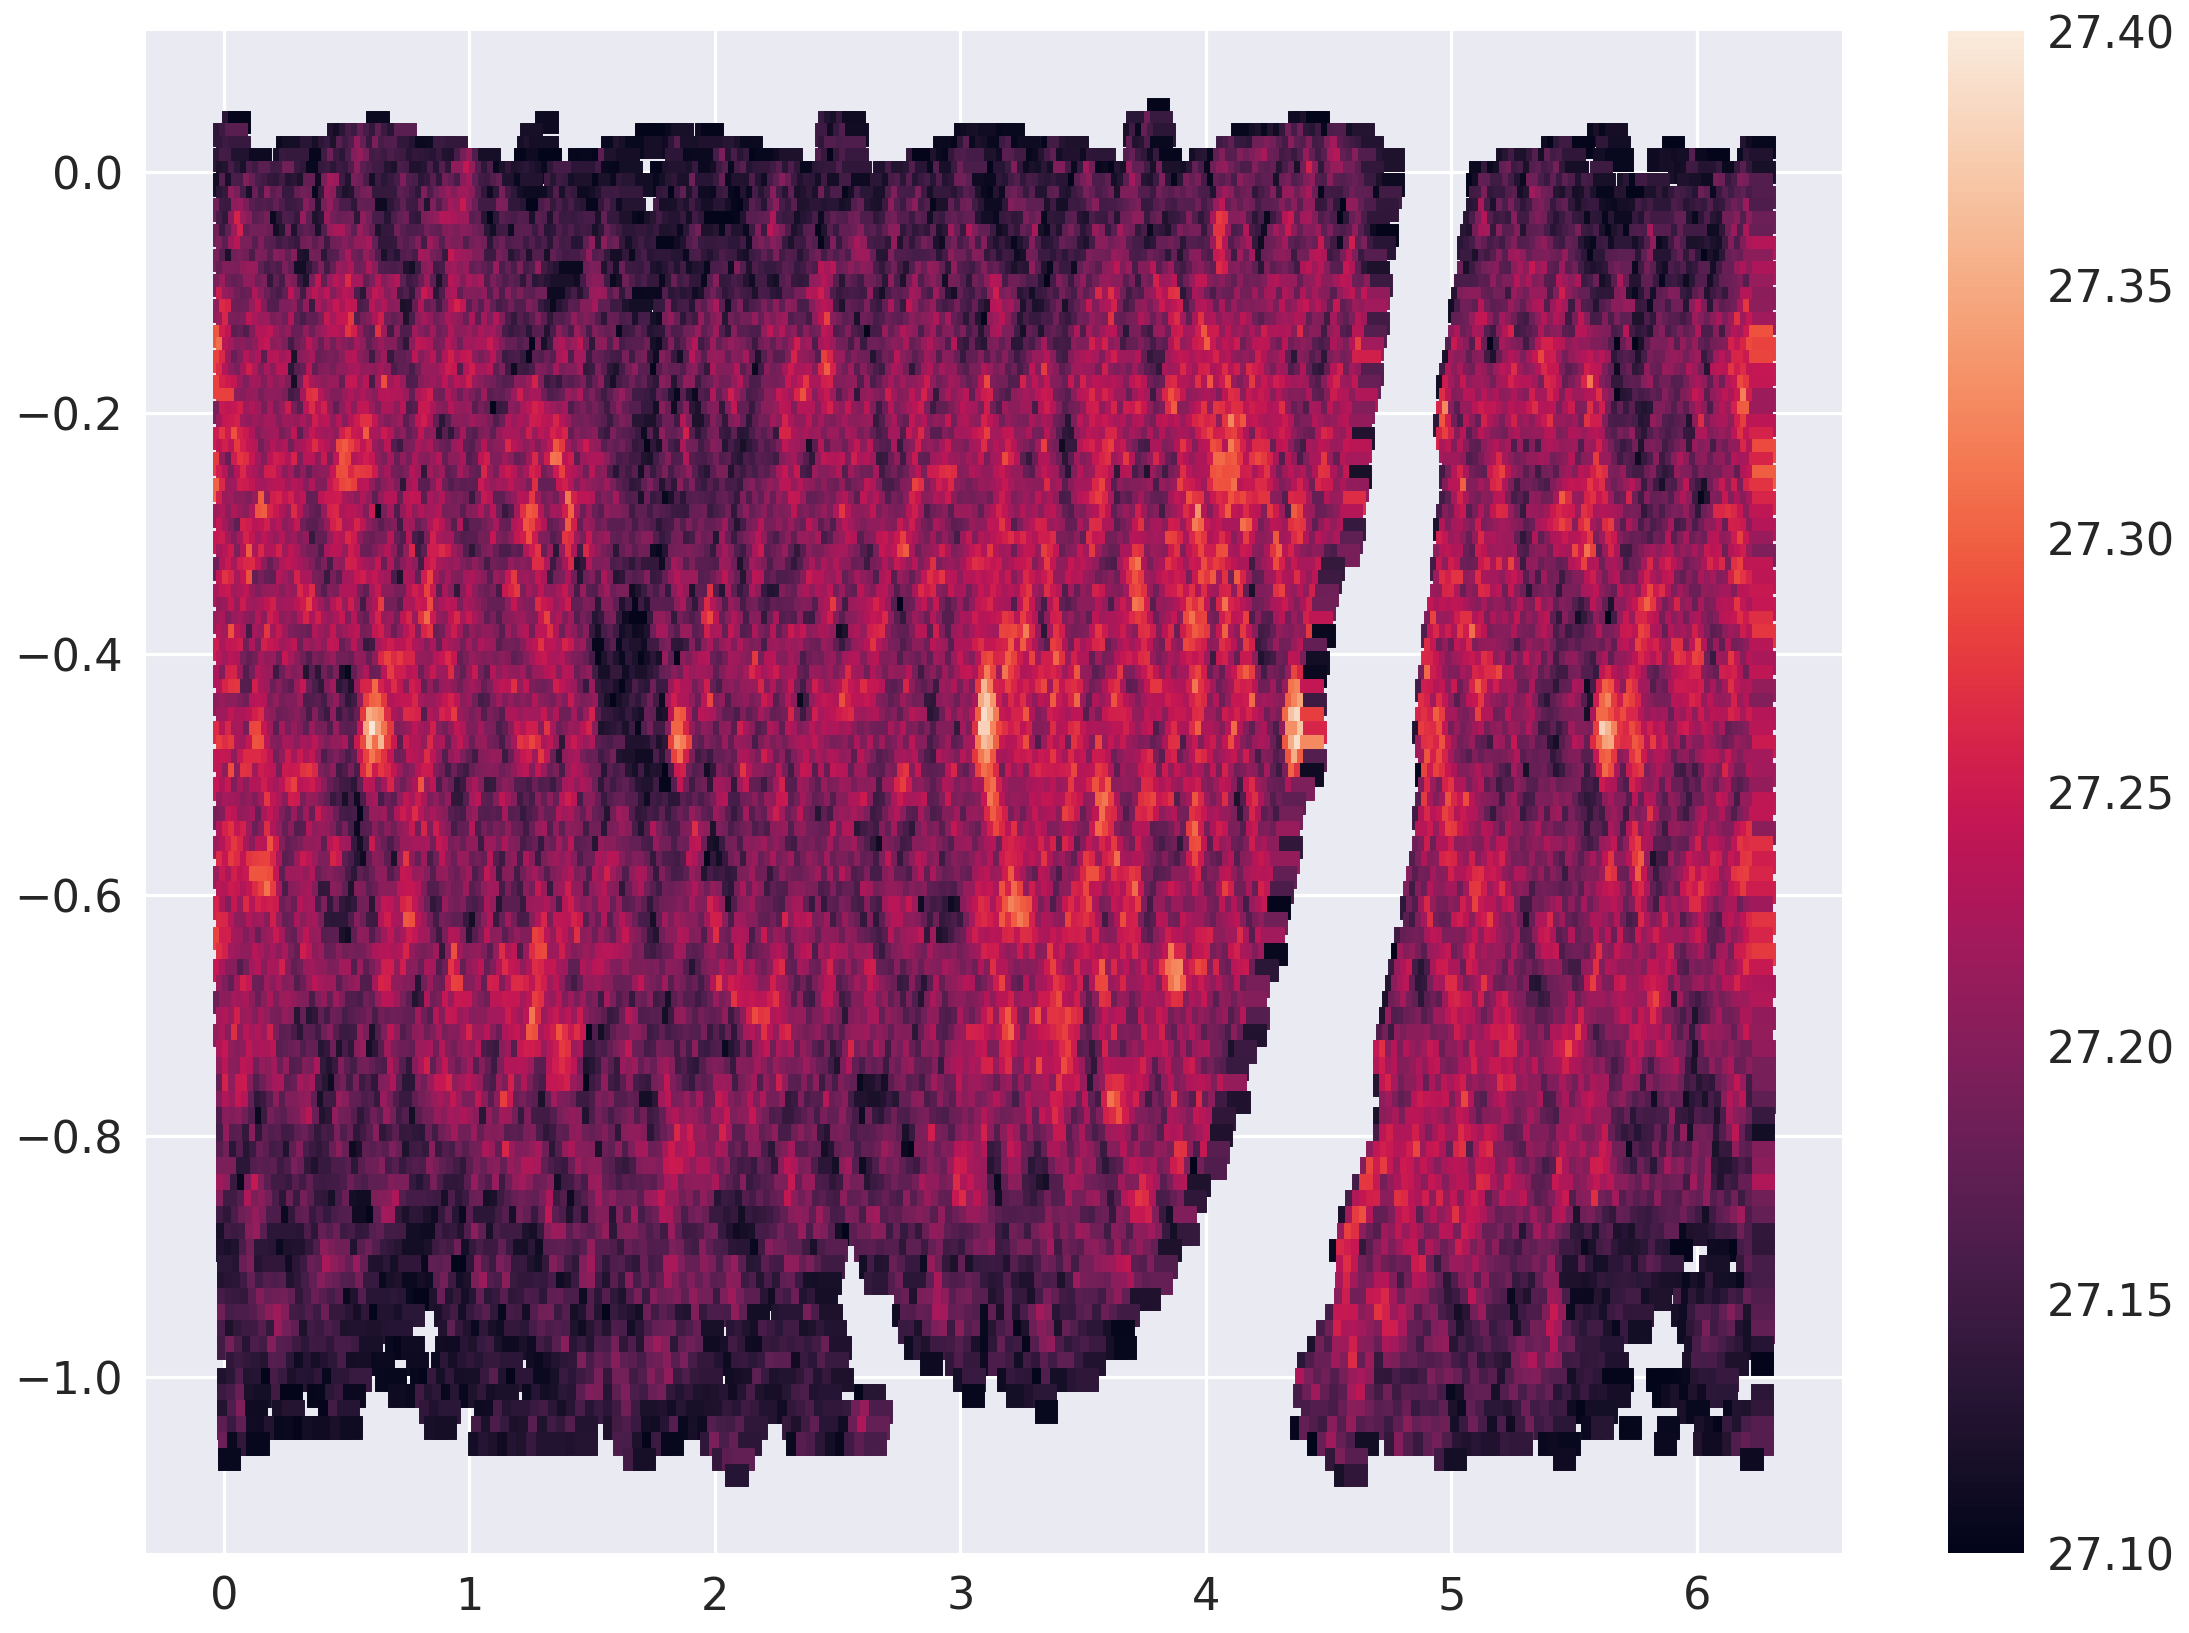

In [7]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=27.1,vmax=27.4,marker=',')
plt.colorbar()

In [ ]:
runName = '/global/homes/h/husni/lsstpsf/simruns/feature_baseline_update_10yrsv2'
opsdb = db.Database(runName+'.db', defaultTable='observations')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric(m5Col="fivesigmadepth")
sqlconstraint = ''
stackerList = []
#slicer3 = slicers.BaseSlicer()
slicer3 = slicers.HealpixSlicer(lonCol='RA', latCol='dec', nside=nside)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer3, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 
bgroup.plotAll(closefigs=False)

In [ ]:
bundle = myBundles['field dither']

In [ ]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>27.32), bundle.metricValues.data<28)

In [ ]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=27.3,vmax=28,marker=',')
plt.colorbar()

In [ ]:
np.save('/global/homes/h/husni/lsstpsf/simruns/feature_baseline.npy', (bgroup.simData['RA'], bgroup.simData['dec']))

In [ ]:
runName = '/global/homes/h/husni/lsstpsf/simruns/alt_sched'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric()
sqlconstraint = 'filter = "r"'
stackerList = []
slicer3 = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec', nside=nside)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer3, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [ ]:
bundle = myBundles['field dither']

In [ ]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>27), bundle.metricValues.data<28)

In [ ]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=27,vmax=28,marker=',')
plt.colorbar()